In [2]:
from skimage import io
import skimage as ski
import matplotlib.pyplot as plt
import numpy as np

# Load Images

img_vis = io.imread("FishImageFiles/fish-vis.tif") # replace None
img_cfp = io.imread("FishImageFiles/fish-cfp-7.tif")

Matplotlib is building the font cache; this may take a moment.


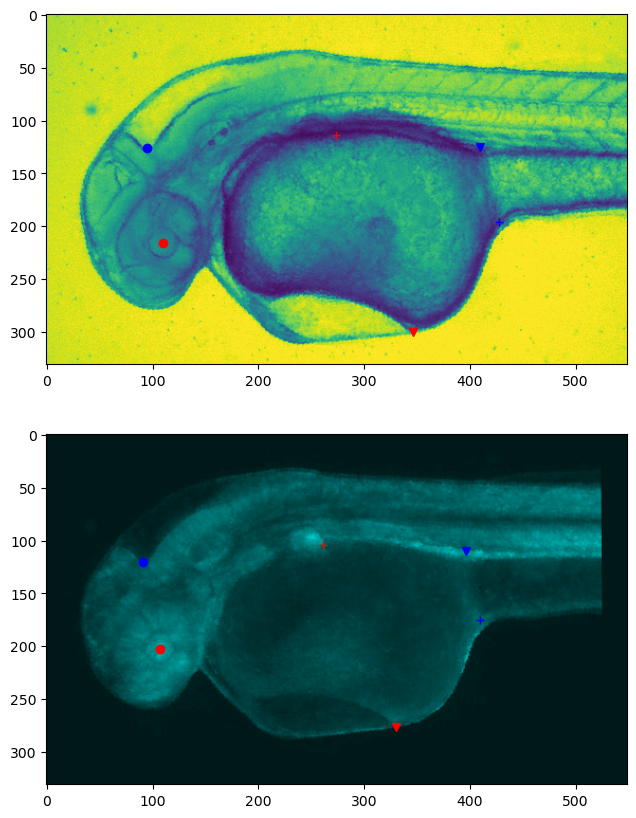

In [17]:
def show_save_image(image, title=None):
    plt.imshow(image)
    
    plt.xticks([])
    plt.yticks([])
    
    if title is not None:
        plt.title(title)
        plt.savefig(f"ad_output/{title}.png", dpi=300, bbox_inches="tight")
        
    plt.show()

## Extract Keypoints

fig,axes = plt.subplots(2, 1,figsize=(10, 10))

#Fill in the key points array in the form as follows [[x1,y1],[x2,y2],[x3,y3]]
keypointsA = [[110, 216], [95, 126], [346, 300], [410, 125], [273, 114], [428, 196]]
keypointsB = [[107, 203], [91, 120], [330, 276], [396, 110], [261, 104], [410, 175]]

# Display the key points
symbols = ['ro','bo','rv','bv','r+','b+']
ax = axes.ravel()

for i in range(0,len(keypointsA)):
    ax[0].plot(keypointsA[i][0],keypointsA[i][1],symbols[i])
for i in range(0,len(keypointsB)):    
    ax[1].plot(keypointsB[i][0],keypointsB[i][1],symbols[i])

ax[0].imshow(img_vis)
ax[1].imshow(img_cfp)
plt.savefig(f"ad_output/6keypoints.png", dpi=300, bbox_inches="tight")

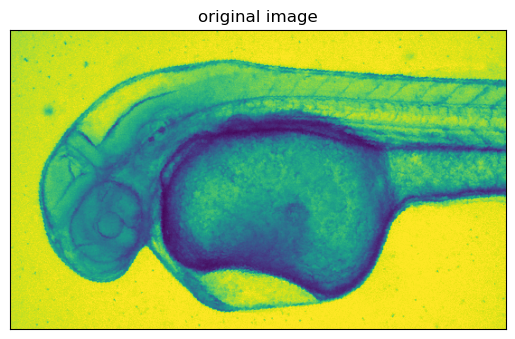

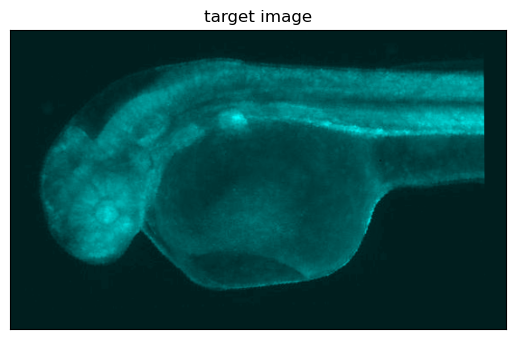

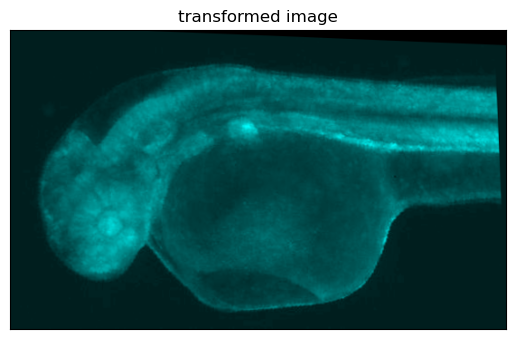

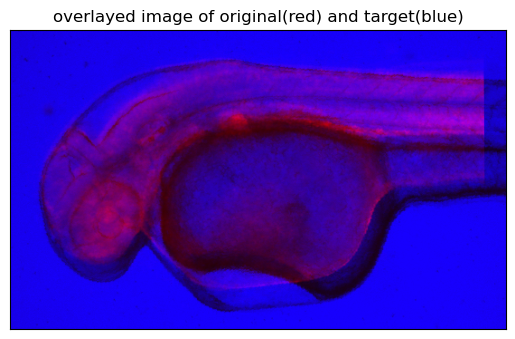

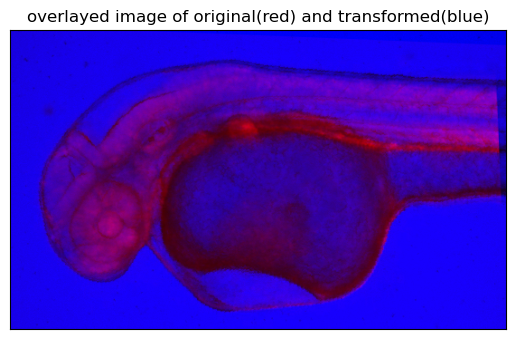

original Mean Squared Error(MSE): 0.3752
transformed Mean Squared Error(MSE): 0.3824


In [20]:
# Estimate the transform: https://scikit-image.org/docs/stable/auto_examples/registration/plot_opticalflow.html#sphx-glr-auto-examples-registration-plot-opticalflow-py
from skimage.transform import ProjectiveTransform, warp
from skimage.color import rgb2gray

src = np.array(keypointsA)
dst = np.array(keypointsB)

transform = ProjectiveTransform()
transform.estimate(src, dst)

warped_image = warp(img_cfp, inverse_map = transform, output_shape = img_vis.shape)

titles = ["original image", "target image", "transformed image"]
imgs = [img_vis, img_cfp, warped_image]

for i in range(0, 3):
    show_save_image(imgs[i], title=titles[i])

def normalize_image(img):
    min_val = np.min(img)
    max_val = np.max(img)
    return (img - min_val) / (max_val - min_val)

# Create the overlayed images: https://scikit-image.org/docs/stable/auto_examples/registration/plot_opticalflow.html#sphx-glr-auto-examples-registration-plot-opticalflow-py
img_vis = normalize_image(img_vis)
img_cfp = normalize_image(img_cfp)

nr, nc = img_vis.shape
overlay_img_original = np.zeros((nr, nc, 3))
overlay_img_transformed = np.zeros((nr, nc, 3))

img_cfp_gray = rgb2gray(img_cfp)
warped_image_gray = rgb2gray(warped_image)

overlay_img_original[... , 0] = img_cfp_gray
overlay_img_original[... , 2] = img_vis

overlay_img_transformed[... , 0] = warped_image_gray
overlay_img_transformed[... , 2] = img_vis

overlay_imgs = [overlay_img_original, overlay_img_transformed]
overlay_titles = ["overlayed image of original(red) and target(blue)", "overlayed image of original(red) and transformed(blue)"]
for i in range(0, 2):
    show_save_image(overlay_imgs[i], title=overlay_titles[i])

In [21]:
from skimage.metrics import mean_squared_error

mse_value_original = mean_squared_error(img_vis, img_cfp_gray)
mse_value_transformed = mean_squared_error(img_vis, warped_image_gray)
print(f"original Mean Squared Error(MSE): {mse_value_original:.4f}\n"
      f"transformed Mean Squared Error(MSE): {mse_value_transformed:.4f}")

original Mean Squared Error(MSE): 0.3752
transformed Mean Squared Error(MSE): 0.3824


In [22]:
from skimage.metrics import structural_similarity as ssim

ssim_value_transformed, _ = ssim(img_vis, warped_image_gray, full=True, data_range=1)
print(f"{ssim_value_transformed:.4f}")

0.1442
